In [44]:
# Necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import joblib
import os



In [45]:
df = pd.read_csv('../data/heart_disease.csv')
df.head()

,PC1,PC7,PC5,PC2,PC10,PC4,PC6,target
0,-1.142929,-0.176824,0.876139,0.304724,0.912271,0.158837,0.595961,0
1,-2.754957,-0.803580,-0.784552,0.839171,-0.236447,0.662535,0.343510,1
2,-2.227239,0.727509,0.701716,-1.063098,0.172939,-0.004591,0.722079,1
3,1.140714,-0.620638,1.395045,-0.565884,-0.182818,-2.411838,-0.672393,0
4,1.701610,-0.685079,0.262726,-0.278171,-0.073178,-0.592310,0.785178,0


In [47]:
X = df.drop(columns=['target'])
y = df['target']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42 , 
    stratify=y
    )

In [49]:
# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

In [50]:
# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained Successfully.")

# Update X_test for downstream cells to use imputed data
X_test = X_test

Logistic Regression trained Successfully.
Decision Tree trained Successfully.
Random Forest trained Successfully.
Support Vector Machine trained Successfully.


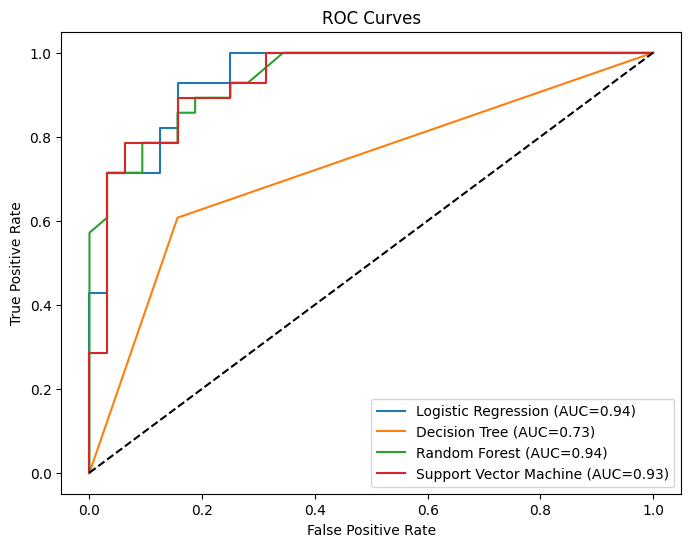

In [51]:
# Evaluate models and plot ROC curves
results = []

plt.figure(figsize=(8,6))

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    results.append([name, acc, prec, rec, f1, auc])
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

In [52]:
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1-Score","AUC"])
print(results_df)

                    Model  Accuracy  Precision    Recall  F1-Score       AUC
0     Logistic Regression  0.816667   0.869565  0.714286  0.784314  0.943080
1           Decision Tree  0.733333   0.772727  0.607143  0.680000  0.725446
2           Random Forest  0.816667   0.869565  0.714286  0.784314  0.940290
3  Support Vector Machine  0.866667   0.916667  0.785714  0.846154  0.934152
